<a href="https://colab.research.google.com/github/CamiloCuspoca-UD/FISICA-DE-SEMICONDUCTORES/blob/main/Proyecto_fisica_semiconductores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

##**UNIVERSIDAD DISTRITAL FRANCISCO JOSÉ DE CALDAS**


<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Escudo_UD.png/746px-Escudo_UD.png">

#**Ingeniería Electrónica**
##**Física de Semiconductores**
##**Proyecto Final**
## Nicolás Velasquez Amarillo - 20202005010
## Juan Camilo Cuspoca Delgado - 20212005043
## Joel Eduardo Reyes Barrios - 20212005011
## Hosman Javier Nieto Cruz- 20212005117

##**Introducción**

El análisis energético, probabilístico y estructural en semiconductores es fundamental para comprender su comportamiento y optimizar su aplicación en dispositivos electrónicos. La energía determina las transiciones electrónicas y la eficiencia de conducción, mientras que los modelos probabilísticos, como la distribución de Maxwell-Boltzmann, permiten describir la ocupación de estados energéticos a diferentes temperaturas. Por otro lado, el análisis estructural, incluyendo los factores de empaquetamiento, influye en la densidad del material y en su conductividad térmica y eléctrica.

El empaquetamiento atómico en una estructura cristalina afecta directamente las propiedades macroscópicas del material. Estructuras más compactas, como la cúbica centrada en la cara (FCC), tienen una mayor densidad y mejor conductividad, mientras que estructuras menos empaquetadas presentan mayor espacio vacío, lo que impacta su respuesta mecánica y térmica. Por ello, el estudio de estos factores permite diseñar materiales semiconductores con propiedades optimizadas para aplicaciones específicas

##**Distribución de probalidad de Maxwell-Boltzmann**



La **estadística de Maxwell-Boltzmann** describe la distribución de partículas en un sistema clásico de muchas partículas en equilibrio térmico, donde se supone que estas partículas son distinguibles y no obedecen el principio de exclusión de Pauli (como lo hacen los electrones en la estadística de Fermi-Dirac). Es especialmente útil para describir gases ideales en condiciones macroscópicas.  

### 1.1 **Distribución de velocidades de Maxwell-Boltzmann**  
Describe la probabilidad de que una partícula tenga una velocidad dentro de un cierto rango en un gas ideal clásico:  


<center>$f(v) = \left(\frac{m}{2\pi k_B T}\right)^{3/2} 4\pi v^2 e^{-\frac{mv^2}{2k_B T}}$</center>


donde:  
- $f(v)$ : es la densidad de probabilidad de encontrar una partícula con velocidad $v$.  
- $m$ : es la masa de la partícula.  
- $k_B$ es la constante de Boltzmann.  
- $T$ es la temperatura absoluta del sistema.  

A partir de esta distribución, se pueden obtener valores característicos:  
- **Velocidad más probable:** $v_p = \sqrt{\frac{2k_B T}{m}}$
- **Velocidad media:** $v_m = \sqrt{\frac{8k_B T}{\pi m}}$
- **Velocidad cuadrática media (RMS):** $v_{rms} = \sqrt{\frac{3k_B T}{m}}$  

### 1.2 **Distribución de Energías de Maxwell-Boltzmann**  
También puede expresarse en términos de la energía cinética \( E \):  

<center>$f(E) = \frac{2}{\sqrt{\pi}} \frac{E^{1/2}}{(k_B T)^{3/2}} e^{-E/k_B T}$</center>


donde:  
- $f(E)$ es la probabilidad de que una partícula tenga energía $E$.  
- La energía cinética media es $\langle E \rangle = \frac{3}{2} k_B T$.  

### 1.3 **Significado Físico**  
- Describe cómo las partículas en un gas ideal se distribuyen en función de su velocidad o energía.  
- Predice la existencia de partículas con altas velocidades, lo que explica fenómenos como la evaporación de líquidos o la fuga de gases de la atmósfera terrestre al espacio.  
- Se aplica en situaciones donde la densidad de partículas es baja y las interacciones cuánticas no son relevantes.  

En comparación con otras estadísticas:  
- **Fermi-Dirac:** Para fermiones (electrones, protones), incluye el principio de exclusión de Pauli.  
- **Bose-Einstein:** Para bosones (fotones, átomos de Bose condensados), permite la condensación en el estado fundamental.  

En resumen, la estadística de Maxwell-Boltzmann es fundamental en la teoría cinética de los gases y en la termodinámica clásica.

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def maxwell_boltzmann(E, T):

    k_B = 1.38e-23  # Constante de Boltzmann (J/K)
    A = 1 / (k_B * T)
    return A * np.exp(-E / (k_B * T))

def energia_cinetica_media(T):

    k_B = 1.38e-23  # Constante de Boltzmann (J/K)
    return 1.5 * k_B * T

def graficar_maxwell_boltzmann():

    E = np.linspace(0, 10e-20, 100)
    temperaturas = [300, 1000, 5000]  # Kelvin

    plt.figure(figsize=(10, 6))
    for T in temperaturas:
        distribucion = maxwell_boltzmann(E, T)
        plt.plot(E, distribucion, label=f"T = {T} K")

        # Marcar energía cinética media
        E_media = energia_cinetica_media(T)
        plt.axvline(x=E_media, color='r', linestyle='--', alpha=0.3)

    plt.xlabel("Energía (J)")
    plt.ylabel("Distribución de Probabilidad")
    plt.title("Distribución de Maxwell-Boltzmann")
    plt.legend()
    plt.grid(True)
    plt.show()
def visualizar_maxwellboltzmann_3d():

    T = 1000  # Temperatura en Kelvin
    E = np.linspace(0, 5e-20, 50)  # Energías
    theta = np.linspace(0, 2*np.pi, 50)  # Ángulo
    E_grid, theta_grid = np.meshgrid(E, theta)


    r_grid = maxwell_boltzmann(E_grid, T)

    x = r_grid * np.cos(theta_grid)
    y = r_grid * np.sin(theta_grid)
    z = E_grid

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(
        x, y, z,
        cmap='viridis',
        alpha=0.8
    )

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Energía (J)')
    ax.set_title('Distribución de Maxwell-Boltzmann en 3D')

    plt.colorbar(surf)
    plt.show()

if __name__ == "__main__":
    graficar_maxwell_boltzmann()
    visualizar_maxwellboltzmann_3d()

ModuleNotFoundError: No module named 'matplotlib'

##**Energía de Lennard Jones**

Implementación del Potencial de Lennard-Jones

El potencial de Lennard-Jones es una función matemática utilizada para modelar la interacción entre átomos o moléculas en un material. Se expresa como:
$$U(r)=4ϵ[(\frac{σ}{r})^{12} - (\frac{σ}{r})^6]$$

donde:

  - $r$ es la distancia entre los átomos,
  - $ϵ$ es la profundidad del pozo de potencial, que representa la energía mínima de la interacción,
  -$σ$ es la distancia a la cual el potencial es cero.

El término $(σ/r)^{12}$ representa la repulsión debida a la superposición de los orbitales electrónicos, mientras que $(σ/r)^{12}$ modela la atracción de van der Waals.
Gráfica del Potencial de Lennard-Jones

Para analizar la interacción entre átomos, se grafican las contribuciones individuales de atracción y repulsión, así como la energía total. A partir de la curva de Lennard-Jones, se puede identificar el punto de equilibrio energético, que corresponde a la distancia interatómica donde la fuerza neta es cero.

Este punto de equilibrio tiene un significado físico importante:

  - Si los átomos están más cerca de esta distancia, la repulsión domina y el sistema es inestable.
  - Si están más lejos, la atracción predomina y los átomos tienden a acercarse.
  - En el equilibrio, la distancia rr es óptima para la estabilidad del material, lo que influye en propiedades mecánicas y estructurales como la dureza y la densidad del semiconductor.

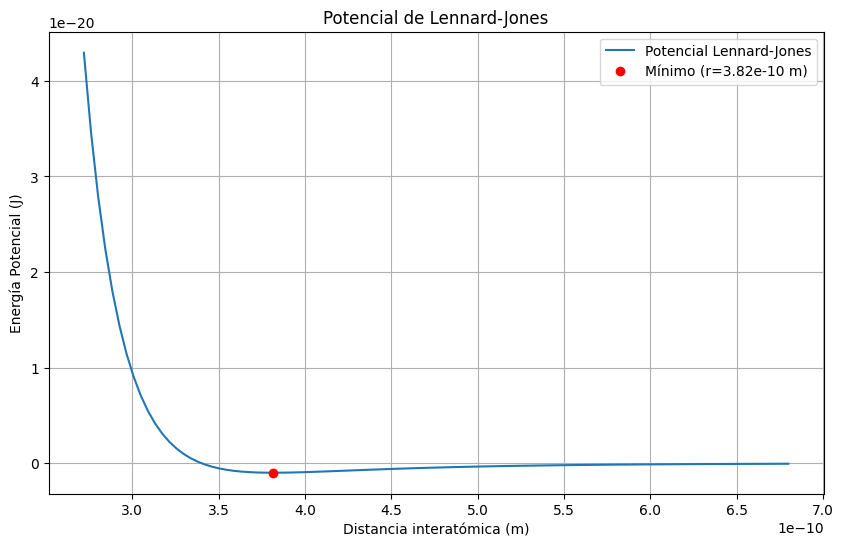

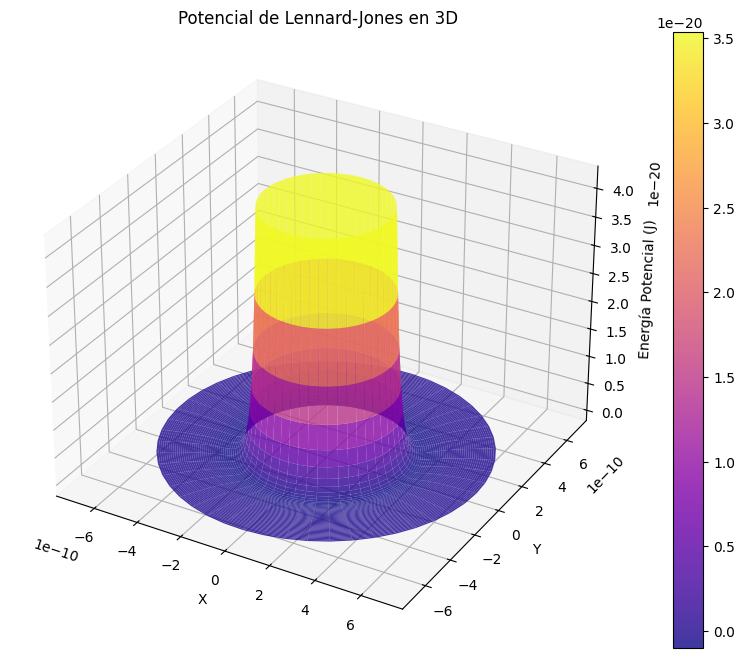

In [ ]:
def lennard_jones(r, epsilon=1e-21, sigma=3.4e-10):
    """Calcula la energía de interacción Lennard-Jones."""
    return 4 * epsilon * ((sigma/r)**12 - (sigma/r)**6)

def encontrar_minimo_potencial(epsilon=1e-21, sigma=3.4e-10):
    """Encuentra el mínimo del potencial Lennard-Jones."""
    r_min = sigma * (2**(1/6))  # Distancia de equilibrio
    return r_min, lennard_jones(r_min, epsilon, sigma)

def graficar_lennard_jones():

    sigma = 3.4e-10  # Valor predeterminado

    r = np.linspace(sigma*0.8, 2*sigma, 100)
    U = lennard_jones(r)

    plt.figure(figsize=(10, 6))
    plt.plot(r, U, label="Potencial Lennard-Jones")

    r_min, U_min = encontrar_minimo_potencial(sigma=sigma)
    plt.plot(r_min, U_min, 'ro', label=f'Mínimo (r={r_min:.2e} m)')

    plt.xlabel("Distancia interatómica (m)")
    plt.ylabel("Energía Potencial (J)")
    plt.title("Potencial de Lennard-Jones")
    plt.legend()
    plt.grid(True)
    plt.show()
def visualizar_lennardjones_3d():

    epsilon = 1e-21  # Profundidad del pozo potencial
    sigma = 3.4e-10  # Distancia en el mínimo del potencial
    r = np.linspace(sigma*0.8, 2*sigma, 50)  # Distancias
    theta = np.linspace(0, 2*np.pi, 50)  # Ángulo
    r_grid, theta_grid = np.meshgrid(r, theta)


    U_grid = lennard_jones(r_grid)


    x = r_grid * np.cos(theta_grid)
    y = r_grid * np.sin(theta_grid)
    z = U_grid


    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')


    surf = ax.plot_surface(
        x, y, z,
        cmap='plasma',
        alpha=0.8
    )


    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Energía Potencial (J)')
    ax.set_title('Potencial de Lennard-Jones en 3D')


    plt.colorbar(surf)
    plt.show()
if __name__ == "__main__":
    graficar_lennard_jones()
    visualizar_lennardjones_3d()

##**Factores de Empaquetamiento**

# **Análisis de Empaquetamiento en Semiconductores**  

El empaquetamiento atómico en una estructura cristalina describe la disposición de los átomos en una celda unitaria y su impacto en las propiedades físicas del material. Este parámetro se cuantifica mediante el **Factor de Empaquetamiento (F.E.)**, definido como:  


$$F.E. = \frac{\text{Volumen ocupado por los átomos}}{\text{Volumen total de la celda}}
$$

## **Relación entre Empaquetamiento y Densidad**  

La densidad (\(\rho\)) de un material está directamente influenciada por el factor de empaquetamiento y se expresa como:  

$$
\rho = \frac{n \cdot M}{V_c \cdot N_A}
$$

donde:  
- $ n $ es el número de átomos por celda,  
- $ M $ es la masa molar del material,  
- $ V_c $ es el volumen de la celda unitaria,  
- $ N_A $ es el número de Avogadro.  

Estructuras con mayor F.E. presentan mayor densidad, ya que el volumen ocupado por los átomos es mayor en comparación con el volumen total de la celda.  

## **Comparación del Número de Átomos por Celda y Espacio Vacío**  

Diferentes estructuras cristalinas tienen distintos factores de empaquetamiento y número de átomos por celda:  

| Tipo de Celda | Átomos por celda | Factor de Empaquetamiento (F.E.) | Espacio vacío (%) |
|--------------|----------------|--------------------------------|------------------|
| Cúbica Simple (SC) | 1 | 0.52 | 48% |
| Cúbica Centrada en el Cuerpo (BCC) | 2 | 0.68 | 32% |
| Cúbica Centrada en la Cara (FCC) | 4 | 0.74 | 26% |

Las estructuras con menor F.E. tienen mayor espacio vacío, lo que puede afectar su resistencia mecánica y otras propiedades.  

## **Relación del Empaquetamiento con la Conductividad Térmica y Eléctrica**  

El empaquetamiento atómico influye en la forma en que los electrones y las vibraciones de red (fonones) se propagan en el material:  

- **Conductividad térmica**: Un F.E. alto indica una mayor proximidad entre átomos, facilitando la transferencia de energía térmica por vibraciones en la red cristalina. Por ejemplo, los metales con empaquetamiento FCC, como el cobre y el aluminio, tienen alta conductividad térmica.  

- **Conductividad eléctrica**: En materiales semiconductores, el empaquetamiento afecta la estructura de bandas y la movilidad de los electrones. Una mayor densidad de átomos puede reducir la dispersión de electrones, favoreciendo una mejor conducción en ciertos casos.  

En conclusión, el empaquetamiento atómico no solo determina la densidad del material, sino que también influye en sus propiedades térmicas y eléctricas, siendo un factor clave en el diseño y optimización de semiconductores para aplicaciones tecnológicas.  


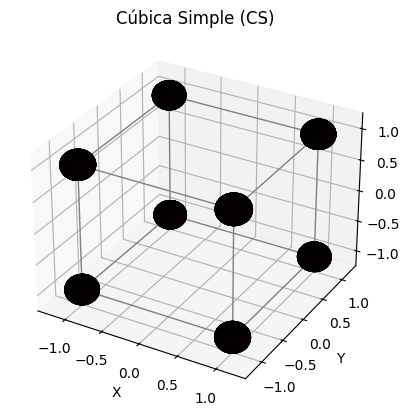

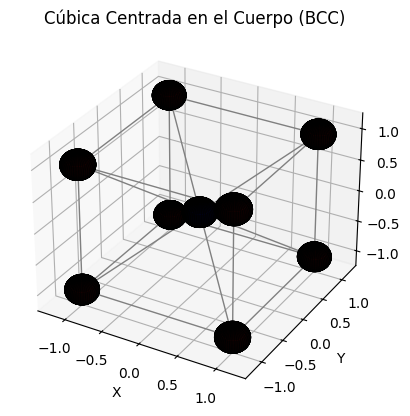

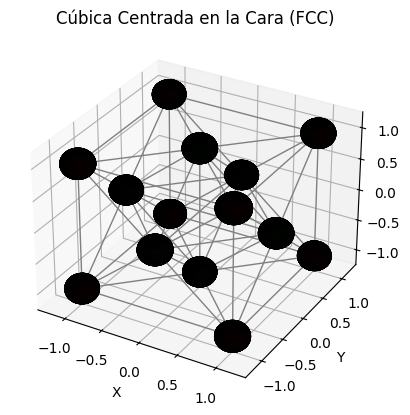

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# Función para dibujar una media esfera
def draw_half_sphere(ax, center, radius, color, direction="up"):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi / 2, 50) if direction == "up" else np.linspace(np.pi / 2, np.pi, 50)
    U, V = np.meshgrid(u, v)

    X = center[0] + radius * np.sin(V) * np.cos(U)
    Y = center[1] + radius * np.sin(V) * np.sin(U)
    Z = center[2] + radius * np.cos(V)

    ax.plot_surface(X, Y, Z, color=color, alpha=0.8, edgecolor='k')

# Estructura Cúbica Simple (CS)
def cubic_simple():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Definir los vértices del cubo
    r = [-1, 1]
    X, Y = np.meshgrid(r, r)

    # Crear superficies para cada cara del cubo
    Z = np.ones_like(X)
    ax.plot_surface(X, Y, Z, color='blue', alpha=0.2)
    ax.plot_surface(X, Y, -Z, color='blue', alpha=0.2)
    ax.plot_surface(X, -1, Y, color='blue', alpha=0.2)
    ax.plot_surface(X, 1, Y, color='blue', alpha=0.2)
    ax.plot_surface(1, X, Y, color='blue', alpha=0.2)
    ax.plot_surface(-1, X, Y, color='blue', alpha=0.2)

    # Definir los átomos en los vértices (medias esferas)
    radius = 0.4
    for x in [-1, 1]:
        for y in [-1, 1]:
            for z in [-1, 1]:
                draw_half_sphere(ax, (x, y, z), radius, 'red', direction="up" if z == 1 else "down")

    ax.set_title("Cúbica Simple (CS)")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Estructura Cúbica Centrada en el Cuerpo (BCC)
def cubic_body_centered():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Definir los vértices del cubo
    r = [-1, 1]
    X, Y = np.meshgrid(r, r)

    # Crear superficies para cada cara del cubo
    Z = np.ones_like(X)
    ax.plot_surface(X, Y, Z, color='blue', alpha=0.2)
    ax.plot_surface(X, Y, -Z, color='blue', alpha=0.2)
    ax.plot_surface(X, -1, Y, color='blue', alpha=0.2)
    ax.plot_surface(X, 1, Y, color='blue', alpha=0.2)
    ax.plot_surface(1, X, Y, color='blue', alpha=0.2)
    ax.plot_surface(-1, X, Y, color='blue', alpha=0.2)

    # Definir los átomos en los vértices y en el centro (medias esferas)
    radius = 0.4
    for x in [-1, 1]:
        for y in [-1, 1]:
            for z in [-1, 1]:
                draw_half_sphere(ax, (x, y, z), radius, 'red', direction="up" if z == 1 else "down")
    draw_half_sphere(ax, (0, 0, 0), radius, 'green', direction="up")

    ax.set_title("Cúbica Centrada en el Cuerpo (BCC)")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Estructura Cúbica Centrada en la Cara (FCC)
def cubic_face_centered():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Definir los vértices del cubo
    r = [-1, 1]
    X, Y = np.meshgrid(r, r)

    # Crear superficies para cada cara del cubo
    Z = np.ones_like(X)
    ax.plot_surface(X, Y, Z, color='blue', alpha=0.2)
    ax.plot_surface(X, Y, -Z, color='blue', alpha=0.2)
    ax.plot_surface(X, -1, Y, color='blue', alpha=0.2)
    ax.plot_surface(X, 1, Y, color='blue', alpha=0.2)
    ax.plot_surface(1, X, Y, color='blue', alpha=0.2)
    ax.plot_surface(-1, X, Y, color='blue', alpha=0.2)

    # Definir los átomos en los vértices y en el centro de cada cara (medias esferas)
    radius = 0.4
    for x in [-1, 1]:
        for y in [-1, 1]:
            for z in [-1, 1]:
                draw_half_sphere(ax, (x, y, z), radius, 'red', direction="up" if z == 1 else "down")
    for x in [-1, 1]:
        draw_half_sphere(ax, (x, 0, 0), radius, 'green', direction="up")
        draw_half_sphere(ax, (0, x, 0), radius, 'green', direction="up")
        draw_half_sphere(ax, (0, 0, x), radius, 'green', direction="up")

    ax.set_title("Cúbica Centrada en la Cara (FCC)")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Llamar a las funciones para visualizar
cubic_simple()
cubic_body_centered()
cubic_face_centered()

## **Implementacion Python para cálculo de factores de empaquetamiento**

In [ ]:
import numpy as np

# Definir el valor de pi
pi = np.pi

# Calcular el Factor de Empaquetamiento (F.E.) para cada estructura
FE_SC = pi / 6  # Cúbica Simple (SC)
FE_BCC = (pi * np.sqrt(3)) / 8  # Cúbica Centrada en el Cuerpo (BCC)
FE_FCC = (pi * np.sqrt(2)) / 6  # Cúbica Centrada en la Cara (FCC)

# Mostrar los resultados
print("Factor de Empaquetamiento (F.E.) para distintas estructuras cristalinas:")
print(f"- SC (Cúbica Simple): F.E. = {FE_SC:.2f}")
print(f"- BCC (Cúbica Centrada en el Cuerpo): F.E. ≈ {FE_BCC:.2f}")
print(f"- FCC (Cúbica Centrada en la Cara): F.E. ≈ {FE_FCC:.2f}")

Factor de Empaquetamiento (F.E.) para distintas estructuras cristalinas:
- SC (Cúbica Simple): F.E. = 0.52
- BCC (Cúbica Centrada en el Cuerpo): F.E. ≈ 0.68
- FCC (Cúbica Centrada en la Cara): F.E. ≈ 0.74


# Relación entre el radio atómico y el Factor de Empaquetamiento

El factor de empaquetamiento (F.E.) es una propiedad geométrica de la estructura cristalina y no depende del radio atómico. Esto significa que, para una estructura cristalina dada (SC, BCC, FCC), el F.E. es constante, independientemente del radio atómico del elemento. Por lo tanto, si graficamos el F.E. en función del radio atómico, obtendremos una línea horizontal para cada estructura cristalina.

Sin embargo, si para visualizar cómo el F.E. varía entre diferentes estructuras cristalinas y cómo se relaciona con el radio atómico de varios elementos, se hara una gráfica que muestre el F.E. constante para cada estructura, junto con los radios atómicos de varios elementos.



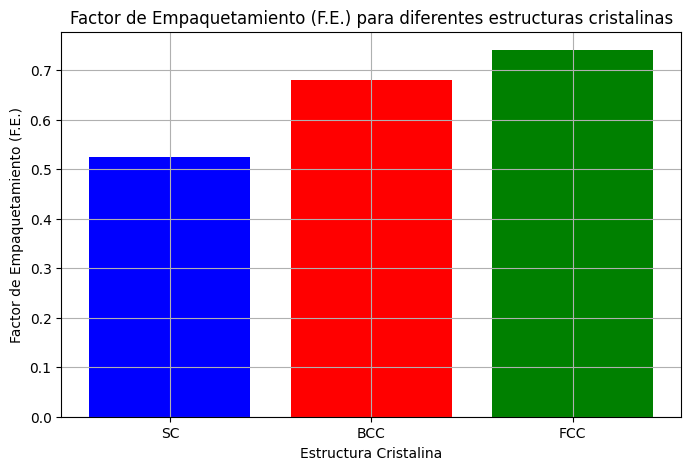

Densidades teóricas (en g/cm³):

Silicio (Si):
- SC: 4.26
- BCC: 5.54
- FCC: 6.03

Cobre (Cu):
- SC: 6.29
- BCC: 8.17
- FCC: 8.89


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros constantes
pi = np.pi
NA = 6.022e23  # Número de Avogadro

# 1. Relación entre el radio atómico y el Factor de Empaquetamiento (F.E.)
def factor_empaquetamiento(estructura):
    if estructura == "SC":
        return pi / 6  # F.E. para Cúbica Simple
    elif estructura == "BCC":
        return (pi * np.sqrt(3)) / 8  # F.E. para Cúbica Centrada en el Cuerpo
    elif estructura == "FCC":
        return (pi * np.sqrt(2)) / 6  # F.E. para Cúbica Centrada en la Cara
    else:
        raise ValueError("Estructura no válida. Usar 'SC', 'BCC' o 'FCC'.")

# Graficar F.E. vs estructura cristalina
estructuras = ["SC", "BCC", "FCC"]
FE_SC = factor_empaquetamiento("SC")
FE_BCC = factor_empaquetamiento("BCC")
FE_FCC = factor_empaquetamiento("FCC")

plt.figure(figsize=(8, 5))
plt.bar(estructuras, [FE_SC, FE_BCC, FE_FCC], color=["blue", "red", "green"])
plt.title("Factor de Empaquetamiento (F.E.) para diferentes estructuras cristalinas")
plt.xlabel("Estructura Cristalina")
plt.ylabel("Factor de Empaquetamiento (F.E.)")
plt.grid(True)
plt.show()

# 2. Relación Empaquetamiento-Densidad: Calcular la densidad teórica
def densidad_teorica(estructura, r, masa_molar):
    if estructura == "SC":
        a = 2 * r  # Parámetro de red para SC
        atomos_por_celda = 1
    elif estructura == "BCC":
        a = (4 * r) / np.sqrt(3)  # Parámetro de red para BCC
        atomos_por_celda = 2
    elif estructura == "FCC":
        a = (4 * r) / np.sqrt(2)  # Parámetro de red para FCC
        atomos_por_celda = 4
    else:
        raise ValueError("Estructura no válida. Usar 'SC', 'BCC' o 'FCC'.")

    volumen_celda = a**3  # Volumen de la celda unitaria
    masa_celda = (atomos_por_celda * masa_molar) / NA  # Masa de la celda unitaria
    densidad = masa_celda / volumen_celda  # Densidad teórica
    return densidad * 1e24  # Convertir a g/cm³

# Parámetros para Si y Cu
r_Si = 1.11  # Radio atómico del Silicio (en Å)
r_Cu = 1.28  # Radio atómico del Cobre (en Å)
masa_molar_Si = 28.0855  # Masa molar del Silicio (en g/mol)
masa_molar_Cu = 63.546  # Masa molar del Cobre (en g/mol)

# Calcular densidades teóricas
densidad_Si_SC = densidad_teorica("SC", r_Si, masa_molar_Si)
densidad_Si_BCC = densidad_teorica("BCC", r_Si, masa_molar_Si)
densidad_Si_FCC = densidad_teorica("FCC", r_Si, masa_molar_Si)

densidad_Cu_SC = densidad_teorica("SC", r_Cu, masa_molar_Cu)
densidad_Cu_BCC = densidad_teorica("BCC", r_Cu, masa_molar_Cu)
densidad_Cu_FCC = densidad_teorica("FCC", r_Cu, masa_molar_Cu)

# Mostrar resultados
print("Densidades teóricas (en g/cm³):")
print("\nSilicio (Si):")
print(f"- SC: {densidad_Si_SC:.2f}")
print(f"- BCC: {densidad_Si_BCC:.2f}")
print(f"- FCC: {densidad_Si_FCC:.2f}")

print("\nCobre (Cu):")
print(f"- SC: {densidad_Cu_SC:.2f}")
print(f"- BCC: {densidad_Cu_BCC:.2f}")
print(f"- FCC: {densidad_Cu_FCC:.2f}")

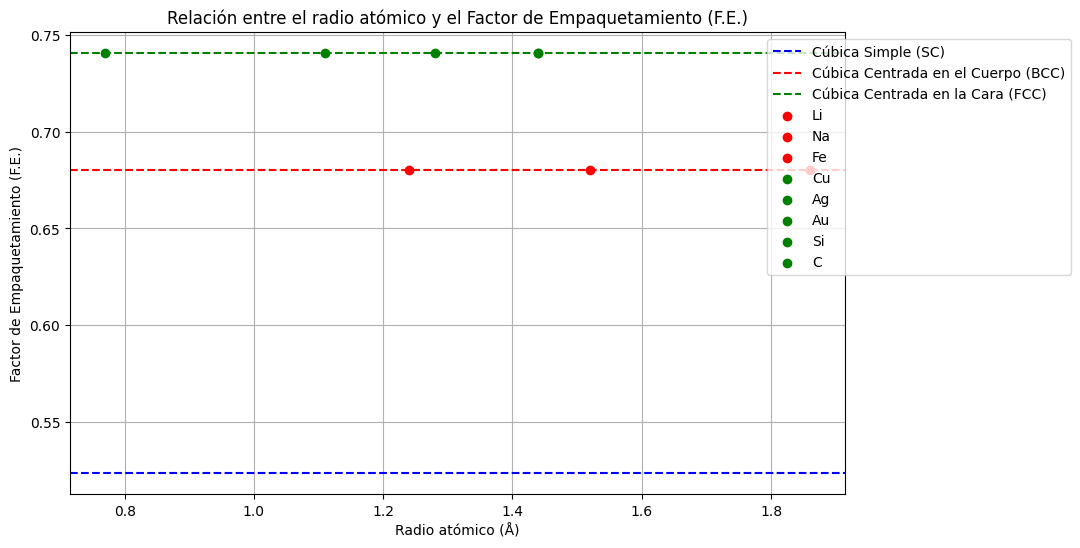

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros constantes
pi = np.pi

# Función para calcular el factor de empaquetamiento
def factor_empaquetamiento(estructura):
    if estructura == "SC":
        return pi / 6  # F.E. para Cúbica Simple
    elif estructura == "BCC":
        return (pi * np.sqrt(3)) / 8  # F.E. para Cúbica Centrada en el Cuerpo
    elif estructura == "FCC":
        return (pi * np.sqrt(2)) / 6  # F.E. para Cúbica Centrada en la Cara
    else:
        raise ValueError("Estructura no válida. Usar 'SC', 'BCC' o 'FCC'.")

# Radios atómicos de varios elementos (en Ångströms)
elementos = {
    "Li": 1.52,  # Litio (BCC)
    "Na": 1.86,  # Sodio (BCC)
    "Fe": 1.24,  # Hierro (BCC)
    "Cu": 1.28,  # Cobre (FCC)
    "Ag": 1.44,  # Plata (FCC)
    "Au": 1.44,  # Oro (FCC)
    "Si": 1.11,  # Silicio (Diamante, similar a FCC)
    "C": 0.77,   # Carbono (Diamante, similar a FCC)
}

# Estructuras cristalinas de los elementos
estructuras_elementos = {
    "Li": "BCC",
    "Na": "BCC",
    "Fe": "BCC",
    "Cu": "FCC",
    "Ag": "FCC",
    "Au": "FCC",
    "Si": "FCC",  # Aproximación para el silicio (estructura diamante)
    "C": "FCC",   # Aproximación para el carbono (estructura diamante)
}

# Factores de empaquetamiento para cada estructura
FE_SC = factor_empaquetamiento("SC")
FE_BCC = factor_empaquetamiento("BCC")
FE_FCC = factor_empaquetamiento("FCC")

# Graficar F.E. vs radio atómico
radios = np.linspace(0.5, 2.0, 100)  # Rango de radios atómicos (en Ångströms)
plt.figure(figsize=(10, 6))

# Líneas horizontales para los F.E. de cada estructura
plt.axhline(FE_SC, color="blue", linestyle="--", label="Cúbica Simple (SC)")
plt.axhline(FE_BCC, color="red", linestyle="--", label="Cúbica Centrada en el Cuerpo (BCC)")
plt.axhline(FE_FCC, color="green", linestyle="--", label="Cúbica Centrada en la Cara (FCC)")

# Puntos para los elementos
for elemento, radio in elementos.items():
    estructura = estructuras_elementos[elemento]
    if estructura == "SC":
        color = "blue"
    elif estructura == "BCC":
        color = "red"
    elif estructura == "FCC":
        color = "green"
    plt.scatter(radio, factor_empaquetamiento(estructura), color=color, label=elemento)

plt.title("Relación entre el radio atómico y el Factor de Empaquetamiento (F.E.)")
plt.xlabel("Radio atómico (Å)")
plt.ylabel("Factor de Empaquetamiento (F.E.)")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

# Relación entre Densidad Teórica y Factor de Empaquetamiento

Para graficar la relación entre la densidad teórica y el factor de empaquetamiento (F.E.), podemos usar la fórmula de densidad teórica que ya tienes en tu código. La densidad teórica depende del factor de empaquetamiento, ya que este último está relacionado con el volumen de la celda unitaria y, por lo tanto, con la densidad.

La densidad teórica se calcula como:

Densidad
=
Masa de la celda unitaria/
Volumen de la celda unitaria
Densidad=
Volumen de la celda unitaria
Masa de la celda unitaria
​

Donde:

La masa de la celda unitaria depende del número de átomos en la celda y la masa molar del material.

El volumen de la celda unitaria depende del parámetro de red
a
a, que a su vez depende del radio atómico
r
r.

El factor de empaquetamiento (F.E.) está relacionado con el volumen ocupado por los átomos en la celda unitaria. A mayor F.E., mayor será la densidad, ya que los átomos están más compactos.

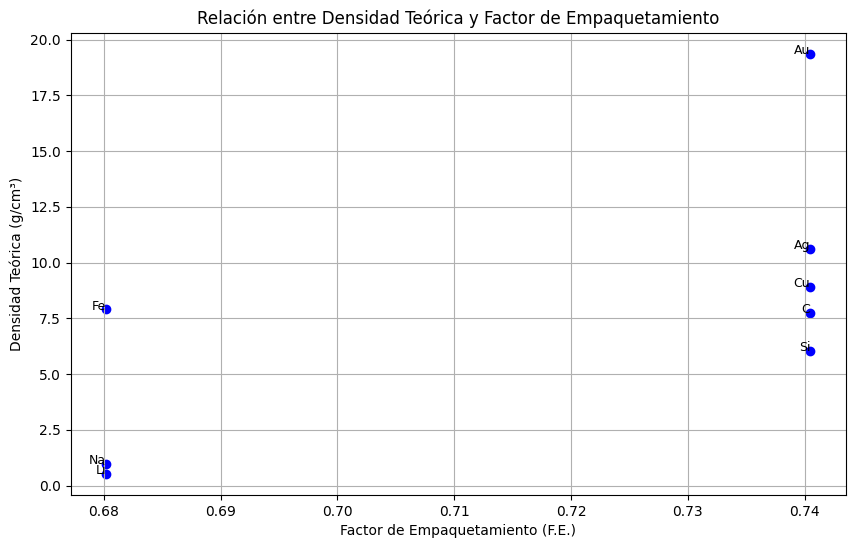

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros constantes
pi = np.pi
NA = 6.022e23  # Número de Avogadro

# Función para calcular el factor de empaquetamiento
def factor_empaquetamiento(estructura):
    if estructura == "SC":
        return pi / 6  # F.E. para Cúbica Simple
    elif estructura == "BCC":
        return (pi * np.sqrt(3)) / 8  # F.E. para Cúbica Centrada en el Cuerpo
    elif estructura == "FCC":
        return (pi * np.sqrt(2)) / 6  # F.E. para Cúbica Centrada en la Cara
    else:
        raise ValueError("Estructura no válida. Usar 'SC', 'BCC' o 'FCC'.")

# Función para calcular la densidad teórica
def densidad_teorica(estructura, r, masa_molar):
    if estructura == "SC":
        a = 2 * r  # Parámetro de red para SC
        atomos_por_celda = 1
    elif estructura == "BCC":
        a = (4 * r) / np.sqrt(3)  # Parámetro de red para BCC
        atomos_por_celda = 2
    elif estructura == "FCC":
        a = (4 * r) / np.sqrt(2)  # Parámetro de red para FCC
        atomos_por_celda = 4
    else:
        raise ValueError("Estructura no válida. Usar 'SC', 'BCC' o 'FCC'.")

    volumen_celda = a**3  # Volumen de la celda unitaria
    masa_celda = (atomos_por_celda * masa_molar) / NA  # Masa de la celda unitaria
    densidad = masa_celda / volumen_celda  # Densidad teórica
    return densidad * 1e24  # Convertir a g/cm³

# Parámetros para varios elementos
elementos = {
    "Li": {"r": 1.52, "masa_molar": 6.94, "estructura": "BCC"},   # Litio (BCC)
    "Na": {"r": 1.86, "masa_molar": 22.99, "estructura": "BCC"},  # Sodio (BCC)
    "Fe": {"r": 1.24, "masa_molar": 55.85, "estructura": "BCC"},  # Hierro (BCC)
    "Cu": {"r": 1.28, "masa_molar": 63.55, "estructura": "FCC"},  # Cobre (FCC)
    "Ag": {"r": 1.44, "masa_molar": 107.87, "estructura": "FCC"}, # Plata (FCC)
    "Au": {"r": 1.44, "masa_molar": 196.97, "estructura": "FCC"}, # Oro (FCC)
    "Si": {"r": 1.11, "masa_molar": 28.09, "estructura": "FCC"},  # Silicio (FCC, aproximación)
    "C": {"r": 0.77, "masa_molar": 12.01, "estructura": "FCC"},   # Carbono (FCC, aproximación)
}

# Calcular densidades y factores de empaquetamiento
densidades = []
factores_empaquetamiento = []
nombres_elementos = []

for elemento, datos in elementos.items():
    r = datos["r"]
    masa_molar = datos["masa_molar"]
    estructura = datos["estructura"]

    densidad = densidad_teorica(estructura, r, masa_molar)
    fe = factor_empaquetamiento(estructura)

    densidades.append(densidad)
    factores_empaquetamiento.append(fe)
    nombres_elementos.append(elemento)

# Graficar densidad vs factor de empaquetamiento
plt.figure(figsize=(10, 6))
plt.scatter(factores_empaquetamiento, densidades, color="blue")

# Anotar los puntos con los nombres de los elementos
for i, elemento in enumerate(nombres_elementos):
    plt.text(factores_empaquetamiento[i], densidades[i], elemento, fontsize=9, ha="right")

plt.title("Relación entre Densidad Teórica y Factor de Empaquetamiento")
plt.xlabel("Factor de Empaquetamiento (F.E.)")
plt.ylabel("Densidad Teórica (g/cm³)")
plt.grid(True)
plt.show()

El factor de empaquetamiento (F.E.) para las estructuras cristalinas más comunes se calcula como:  

- **BCC (Cúbica Centrada en el Cuerpo)**: $ F.E. = \frac{2 \cdot \frac{4}{3} \pi r^3}{a^3} = 0.68 $  
- **FCC (Cúbica Centrada en las Caras)**: $ F.E. = \frac{4 \cdot \frac{4}{3} \pi r^3}{a^3} = 0.74 $  

Donde el parámetro de red $ a $ se relaciona con el radio atómico $ r $ según:  
- **BCC**: $ a = \frac{4r}{\sqrt{3}} $  
- **FCC**: $ a = \frac{4r}{\sqrt{2}}$  

Usando estos valores, los factores de empaquetamiento de los elementos dados son:  

| Elemento | Estructura | Radio Atómico (Å) | F.E. |
|----------|------------|-------------------|------|
| Li (Litio) | BCC | 1.52 | 0.68 |
| Na (Sodio) | BCC | 1.86 | 0.68 |
| Fe (Hierro) | BCC | 1.24 | 0.68 |
| Cu (Cobre) | FCC | 1.28 | 0.74 |
| Ag (Plata) | FCC | 1.44 | 0.74 |
| Au (Oro) | FCC | 1.44 | 0.74 |
| Si (Silicio) | FCC (aprox.) | 1.11 | 0.74 |
| C (Carbono) | FCC (aprox.) | 0.77 | 0.74 |

Estos valores muestran que el factor de empaquetamiento es constante dentro de cada tipo de estructura cristalina, independiente del radio atómico del elemento.
